<a href="https://colab.research.google.com/github/Asakeblessing/Data-Science-Project/blob/main/Topsis_ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data PreProcessing

In [ ]:
# Libraries Import

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Install Packages

!pip install pandas numpy scikit-learn matplotlib seaborn


TOPSIS Score

In [ ]:
topsis_scores = dist_to_negative_ideal / (dist_to_ideal + dist_to_negative_ideal)


Ranking For TOPSIS Score

In [ ]:
topsis_grouped['TOPSIS_Score'] = topsis_scores
topsis_grouped['Rank'] = topsis_grouped['TOPSIS_Score'].rank(ascending=False)
topsis_ranked = topsis_grouped.sort_values(by='Rank')


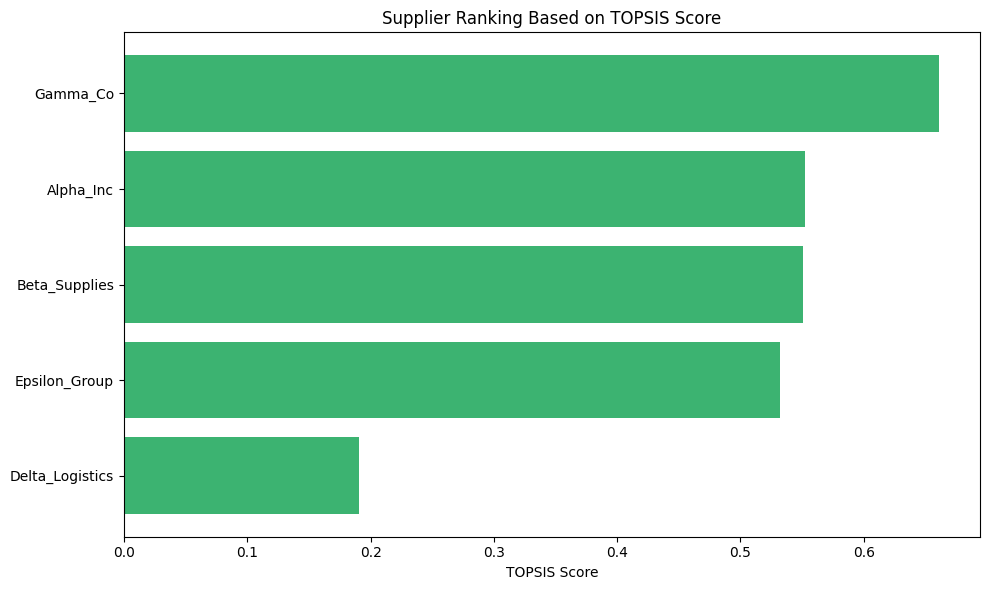

In [ ]:
#Visualize TOPSIS Score using Barchart

topsis_ranked_sorted = topsis_ranked.sort_values(by='TOPSIS_Score', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(
    topsis_ranked_sorted['Supplier'],
    topsis_ranked_sorted['TOPSIS_Score'],
    color='mediumseagreen'
)
plt.xlabel('TOPSIS Score')
plt.title('Supplier Ranking Based on TOPSIS Score')
plt.tight_layout()
plt.show()

In [ ]:
#Final Ranking

topsis_ranked.reset_index(drop=True)

,Supplier,Cost_Savings,Delivery_Duration,Defect_Rate_Percent,TOPSIS_Score,Rank
0,Gamma_Co,5072.086853,10.174825,5.568381,0.661220,1.0
1,Alpha_Inc,4885.960922,10.503546,4.634081,0.552283,2.0
2,Beta_Supplies,5704.749295,11.166667,9.824906,0.550757,3.0
3,Epsilon_Group,5090.242048,10.777108,6.329604,0.531698,4.0
4,Delta_Logistics,4572.961930,10.754386,13.922570,0.190518,5.0


In [ ]:
# Assign supplier performance class based on TOPSIS Score tertiles
topsis_ranked['Performance_Class'] = pd.qcut(
    topsis_ranked['TOPSIS_Score'],
    q=3,
    labels=['Low', 'Medium', 'High']
)


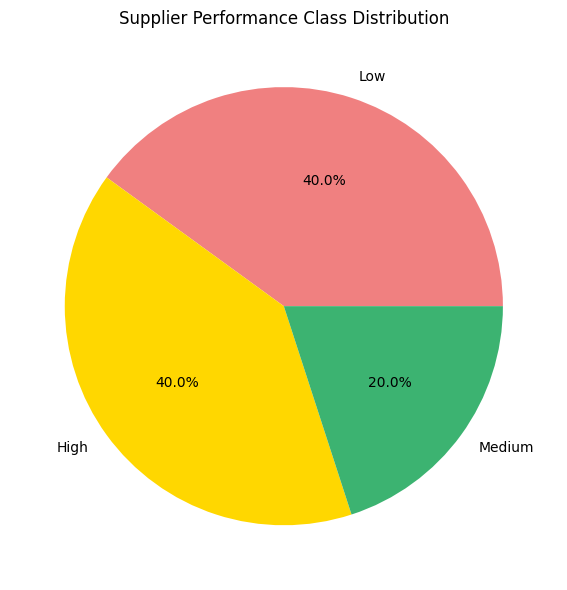

In [ ]:
# Pie chart
class_counts = topsis_ranked['Performance_Class'].value_counts() # Calculate class counts here
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'gold', 'mediumseagreen'])
plt.title('Supplier Performance Class Distribution')
plt.tight_layout()
plt.show()

In [ ]:
# Create grouped table
grouped_suppliers = topsis_ranked[['Supplier', 'Performance_Class']].sort_values(by='Performance_Class')
grouped_suppliers


,Supplier,Performance_Class
3,Epsilon_Group,Low
2,Delta_Logistics,Low
1,Beta_Supplies,Medium
4,Gamma_Co,High
0,Alpha_Inc,High


In [ ]:
topsis_ranked.to_csv("TOPSIS_final_ranking.csv", index=False)


In [ ]:
from google.colab import files
files.download("TOPSIS_final_ranking.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>